<a href="https://colab.research.google.com/github/MouadCherrat/Netflix_K-means/blob/main/colors_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation des Images par K-means (Color Segmentation)

## Informations sur le projet
- **Nom et Prénom** : Mouad Cherrat , Khalil Souidi , Zouhair Lafrougi , Imane el Alji , Kenza Ouattas
- **École** : EMSI  

---

## Définition de la segmentation des couleurs avec K-means

La segmentation des couleurs est une technique utilisée pour diviser une image en régions distinctes en fonction des valeurs de couleur. Cette méthode est couramment utilisée en vision par ordinateur pour simplifier l’analyse des images.

Dans cette approche, l'algorithme **K-means** est appliqué pour regrouper les pixels de l'image en **K clusters**, où chaque cluster représente une gamme de couleurs similaires. Le processus peut être résumé comme suit :

1. **Initialisation** : Choisir aléatoirement $ K $ centres (ou centroids) de clusters.  
2. **Assignation des clusters** : Associer chaque pixel $ x_i $ au cluster $ C_k $ correspondant au centroïde le plus proche selon la distance euclidienne :  
   $$
   C_k = \text{arg min}_{j} \| x_i - \mu_j \|^2
   $$
   où $ \mu_j $ est le centroïde du cluster $ j $.

3. **Mise à jour des centroïdes** : Calculer le nouveau centroïde $ \mu_j $ de chaque cluster en prenant la moyenne des pixels assignés :  
   $$
   \mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
   $$

4. **Répétition** : Répéter les étapes 2 et 3 jusqu'à convergence (c'est-à-dire lorsque les centroïdes ne changent plus ou que le nombre maximal d'itérations est atteint).

### Avantages
- Réduction du nombre de couleurs dans une image, simplifiant ainsi son traitement.  
- Identification des régions homogènes basées sur les caractéristiques des couleurs.

### Applications
- Compression d’images.  
- Analyse de scènes en vision par ordinateur.  
- Segmentation pour l'extraction d'objets dans les images.

---

## Objectif du Projet
L'objectif de ce projet est de mettre en œuvre la segmentation des couleurs avec l'algorithme K-means afin de segmenter efficacement les images en fonction des couleurs dominantes. Nous utiliserons Python et des bibliothèques comme OpenCV et Scikit-learn pour ce faire.

---


In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np  # Pour les opérations mathématiques et le traitement des données
import matplotlib.pyplot as plt  # Pour la visualisation des données et des images
from matplotlib.image import imread  # Pour lire les fichiers image
from sklearn.cluster import KMeans
import pandas as pd

Dimensions de l'image : (379, 552, 4)


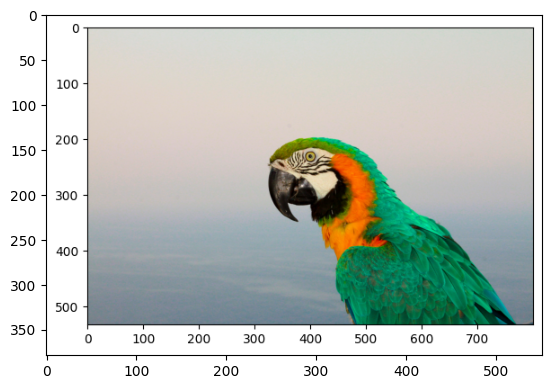

In [ ]:
image_path = '/content/perroquet.png'
image = imread(image_path)
# Afficher les dimensions de l'image
print(f"Dimensions de l'image : {image.shape}")

# Afficher l'image
plt.imshow(image);


### Interprétation des dimensions de l'image

L'image chargée a les dimensions suivantes : **(533, 800, 3)**.

- **533** : Hauteur de l'image en pixels (nombre de lignes).  
- **800** : Largeur de l'image en pixels (nombre de colonnes).  
- **3** : Nombre de canaux, indiquant que l'image est en couleur au format RGB (Rouge, Vert, Bleu).  

#### Format RGB (Rouge, Vert, Bleu)
Les images RGB possèdent trois canaux de couleur, chacun représentant une des couleurs primaires : Rouge, Vert et Bleu.  
Chaque canal contient des valeurs d'intensité allant de 0 à 255. En combinant ces trois canaux, il est possible de représenter une large gamme de couleurs.

Ces informations sont essentielles pour comprendre la structure de l'image et déterminer les étapes nécessaires pour la prétraiter ou la segmenter.


## Remodélisation de l'image en tableau 2D

**Pourquoi faire cela ?** :
Cette transformation est nécessaire pour pouvoir appliquer notre algorithme de clustering **K-Means**.

Ce algorithme prend généralement des données sous forme de tableau 2D où chaque ligne représente un point de données (ici, un pixel) et chaque colonne représente une caractéristique (ici, les trois couleurs RGB).

In [ ]:
# Remodeler l'image en un tableau 2D (nombre total de pixels, 3 canaux)
x = image.reshape(-1, 3)
print(x.shape)

(278944, 3)


## Application du Clustering K-Means pour la segmentation de l'image

Dans cette partie, nous allons appliquer l'algorithme de **clustering K-Means** pour segmenter l'image en 4 clusters de couleurs. Le processus sera le suivant :

1. **Appliquer K-Means** : Nous allons entraîner le modèle K-Means sur les pixels de l'image, en utilisant 4 clusters. Chaque pixel sera associé à l'un des 4 clusters.
   
2. **Segmentation de l'image** : Une fois que le modèle est entraîné, nous allons assigner à chaque pixel la couleur du centroïde du cluster auquel il appartient. Cela nous permettra de créer une image où chaque pixel a une couleur homogène correspondant à l'un des clusters.

3. **Affichage des résultats** : Nous afficherons ensuite l'image segmentée, avec les pixels regroupés par couleur dominante (en fonction des clusters).

4. **Examen des résultats** : Nous afficherons les centres des clusters et les labels des clusters pour chaque pixel afin d'analyser le résultat du clustering.

Nous allons maintenant implémenter ce processus en utilisant le code Python suivant :

In [ ]:
# Initialiser le modèle KMeans avec hyperparamètres ajustés
kmeans = KMeans(
    n_clusters=3,  # Nombre de clusters
    init='k-means++',  # Initialisation intelligente des centroïdes
    max_iter=300,  # Nombre maximum d'itérations
    n_init=10,  # Nombre de réinitialisations du clustering pour éviter les minima locaux
    random_state=42  # Pour la reproductibilité
).fit(x)

In [ ]:
# Obtenir les labels et les centroïdes
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## Explication : Obtenir les Labels et les Centroïdes dans le Clustering K-Means

**Contexte**

Dans un algorithme de clustering K-Means, chaque pixel de l'image est affecté à un cluster (label), et les centroïdes de ces clusters représentent les couleurs moyennes de chaque groupe. Ces informations permettent de segmenter l'image en fonction des couleurs dominantes.

In [ ]:
# Afficher les centroïdes des clusters
centroids_df = pd.DataFrame(centroids, columns=['Red', 'Green', 'Blue'])
centroids_df['Cluster_Label'] = [f'Cluster {i}' for i in range(len(centroids))]
print("\nCentroïdes des clusters :")
print(centroids_df)


Centroïdes des clusters :
        Red     Green      Blue Cluster_Label
0  0.880000  0.896556  0.880606     Cluster 0
1  0.703063  0.421308  0.688059     Cluster 1
2  0.206042  0.757347  0.238614     Cluster 2


In [ ]:
# Afficher les 5 premières lignes des pixels avec leurs labels
df = pd.DataFrame(x, columns=['Red', 'Green', 'Blue'])
df['Cluster_Label'] = labels
print("\nExtrait des données des pixels et labels :")
print(df.head())


Extrait des données des pixels et labels :
   Red  Green  Blue  Cluster_Label
0  1.0    1.0   1.0              0
1  1.0    1.0   1.0              0
2  1.0    1.0   1.0              0
3  1.0    1.0   1.0              0
4  1.0    1.0   1.0              0


Après l'application de l'algorithme de clustering K-Means, chaque pixel est remplacé par la couleur moyenne de son cluster (centroïde). Pour visualiser le résultat, l'image segmentée est recréée à partir des labels et des centroïdes.


In [ ]:
# Créer une nouvelle image segmentée
segmented_image = segmented_image.reshape(image.shape)
segmented_image = segmented_image.astype(np.uint8)  # Convertir en type entier pour les images


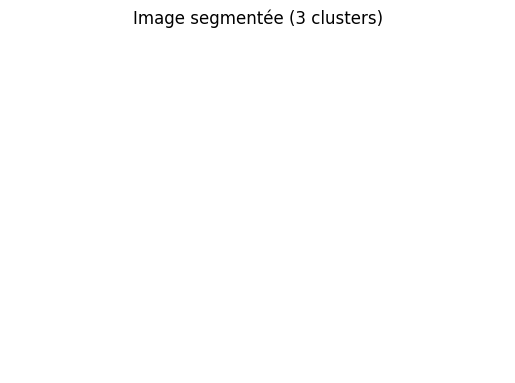

In [ ]:
# Afficher l'image segmentée
plt.imshow(segmented_image)
plt.axis('off')  # Supprimer les axes
plt.title("Image segmentée (3 clusters)")
plt.show()

## Évaluation de la Qualité du Clustering : Calcul de l'Inertie

### Contexte
L'inertie est une métrique utilisée pour évaluer la qualité d'un clustering réalisé avec l'algorithme K-Means. Elle mesure la somme des distances au carré entre chaque point de données et le centroïde de son cluster. Une inertie plus faible indique des clusters plus compacts et mieux séparés.

## Calcul de l'Inertie

L'inertie se calcule comme suit :

$$
\text{Inertie} = \sum_{i=1}^{n} \sum_{j=1}^{k} 1(c_i = j) \cdot \|x_i - \mu_j\|^2
$$

### Définition des termes
- $ n $ : Nombre total de points de données.
- $ k $ : Nombre de clusters.
- $ x_i $ : $ i $-ème point de données.
- $ \mu_j $ : Centroïde du cluster $ j $.
- $ 1(c_i = j) $ : Indicateur valant 1 si le point $ x_i $ appartient au cluster $ j $, sinon 0.
- $ \|x_i - \mu_j\|^2 $ : Distance euclidienne au carré entre $ x_i $ et $ \mu_j $.

### Interprétation
- **Valeur faible** : Les clusters sont compacts, ce qui indique un bon regroupement des points.
- **Valeur élevée** : Les points sont dispersés ou mal regroupés, ce qui peut indiquer que le nombre de clusters n'est pas optimal.


In [ ]:
# Calculer l'inertie pour évaluer la qualité du clustering
print(f"Inertie du modèle KMeans : {kmeans.inertia_}")

Inertie du modèle KMeans : 24041.8125


La méthode du coude est une technique couramment utilisée pour déterminer le nombre optimal de clusters dans un modèle de clustering K-Means. L'idée est de tracer l'inertie en fonction du nombre de clusters, puis de choisir le \(k\) où l'inertie commence à diminuer plus lentement, formant un "coude" dans le graphique.


In [ ]:
# Ajouter une visualisation du choix du nombre de clusters avec la méthode elbow
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans_test = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_test.fit(x)
    inertias.append(kmeans_test.inertia_)

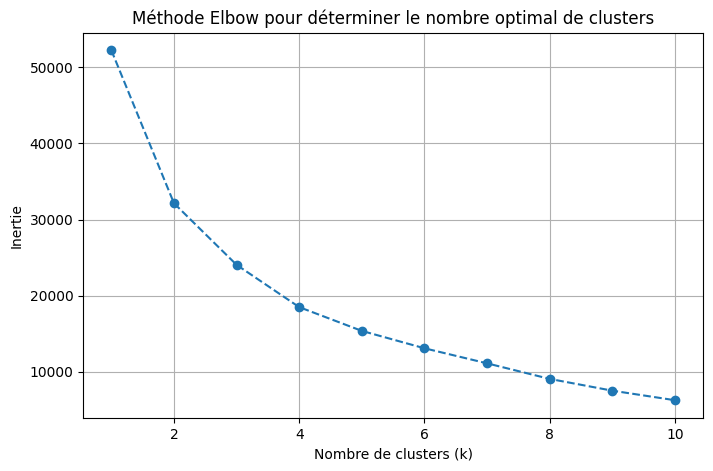

In [ ]:
# Tracer le graphique de la méthode elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='--')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Méthode Elbow pour déterminer le nombre optimal de clusters")
plt.grid()
plt.show()

## Choix du Nombre de Clusters

À partir du graphique obtenu avec la méthode du coude, nous pouvons observer qu'il existe un **"coude"** à environ **3 clusters**. Ce point marque l'endroit où la diminution de l'inertie devient moins significative, indiquant qu'ajouter plus de clusters ne réduit pas beaucoup l'inertie.

### Interprétation du graphique
Le **"coude"** se situe à **3 clusters**, ce qui suggère que c'est le nombre optimal pour segmenter les données de manière efficace. L'inertie continue de diminuer après 3, mais la réduction devient beaucoup plus lente, ce qui signifie que l'ajout de clusters supplémentaires n'améliore pas beaucoup la qualité du clustering.

### Conclusion
C'est pourquoi nous avons choisi **3 clusters** dans les hyperparamètres du modèle K-Means, car ce choix maximise la séparation des données tout en minimisant la complexité du modèle.
